In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [10]:
data = pd.read_csv("car_prices.csv")

In [11]:
data.shape

(558837, 16)

In [12]:
top_5_rows = data.head(5)
top_5_rows


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [14]:
data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [15]:
# % null values
data.isnull().sum()/data.shape[0]

year            0.000000
make            0.018433
model           0.018608
trim            0.019059
body            0.023612
transmission    0.116943
vin             0.000007
state           0.000000
condition       0.021151
odometer        0.000168
color           0.001340
interior        0.001340
seller          0.000000
mmr             0.000068
sellingprice    0.000021
saledate        0.000021
dtype: float64

In [16]:
# Renaming the columns
data.rename(columns={'sellingprice': 'selling_price'}, inplace=True)
data.rename(columns={'saledate': 'sale_date'}, inplace=True)

In [17]:
# Overall % of null values
(data.isnull().sum().sum()/(data.shape[0]*data.shape[1])) * 100

1.3798298967319629

Text(0.5, 1.0, 'Before Removing null values')

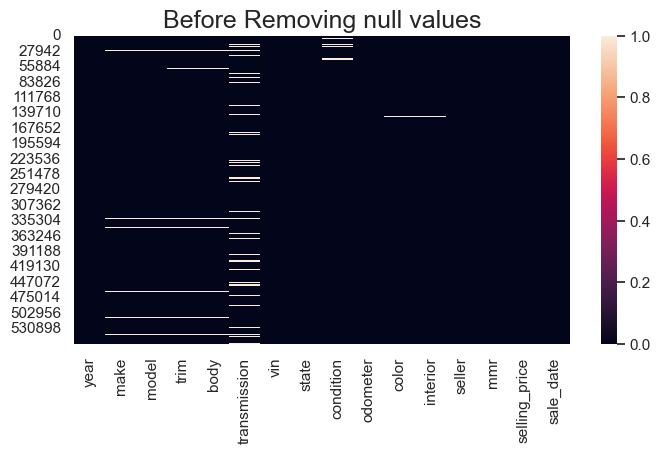

In [18]:
# Heatmap to show the null values
sns.set(rc = {'figure.figsize' : (8,4)})
sns.heatmap(data.isnull())
plt.title("Before Removing null values",fontsize = 18)

In [19]:
data.dropna(inplace = True)

Text(0.5, 1.0, 'After Removing null values')

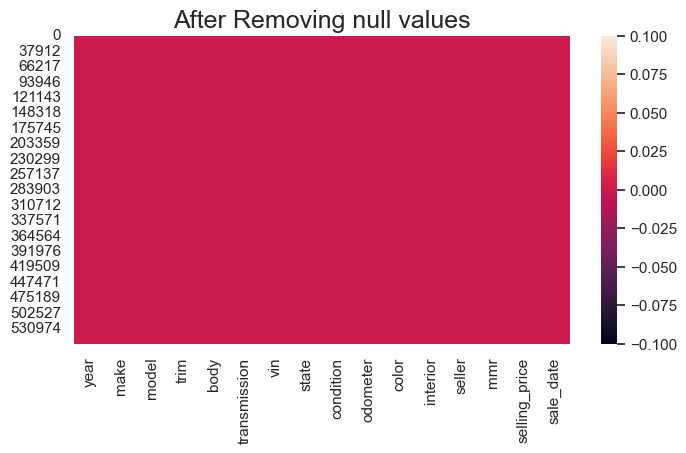

In [20]:
sns.set(rc = {'figure.figsize' : (8,4)})
sns.heatmap(data.isnull())
plt.title("After Removing null values",fontsize = 18)

In [21]:
# Checking for duplicate values
data.duplicated().sum()

0

In [22]:
Descriptive_statistics = data.describe().T
Descriptive_statistics

,count,mean,std,min,25%,50%,75%,max
year,472325.0,2010.210980,3.822151,1990.0,2008.0,2012.0,2013.0,2015.0
condition,472325.0,30.774177,13.286866,1.0,24.0,35.0,41.0,49.0
odometer,472325.0,66701.732040,51939.586894,1.0,28137.0,51085.0,96590.0,999999.0
mmr,472325.0,13837.058964,9532.229273,25.0,7425.0,12300.0,18300.0,182000.0
selling_price,472325.0,13690.512058,9613.033738,1.0,7200.0,12200.0,18200.0,230000.0


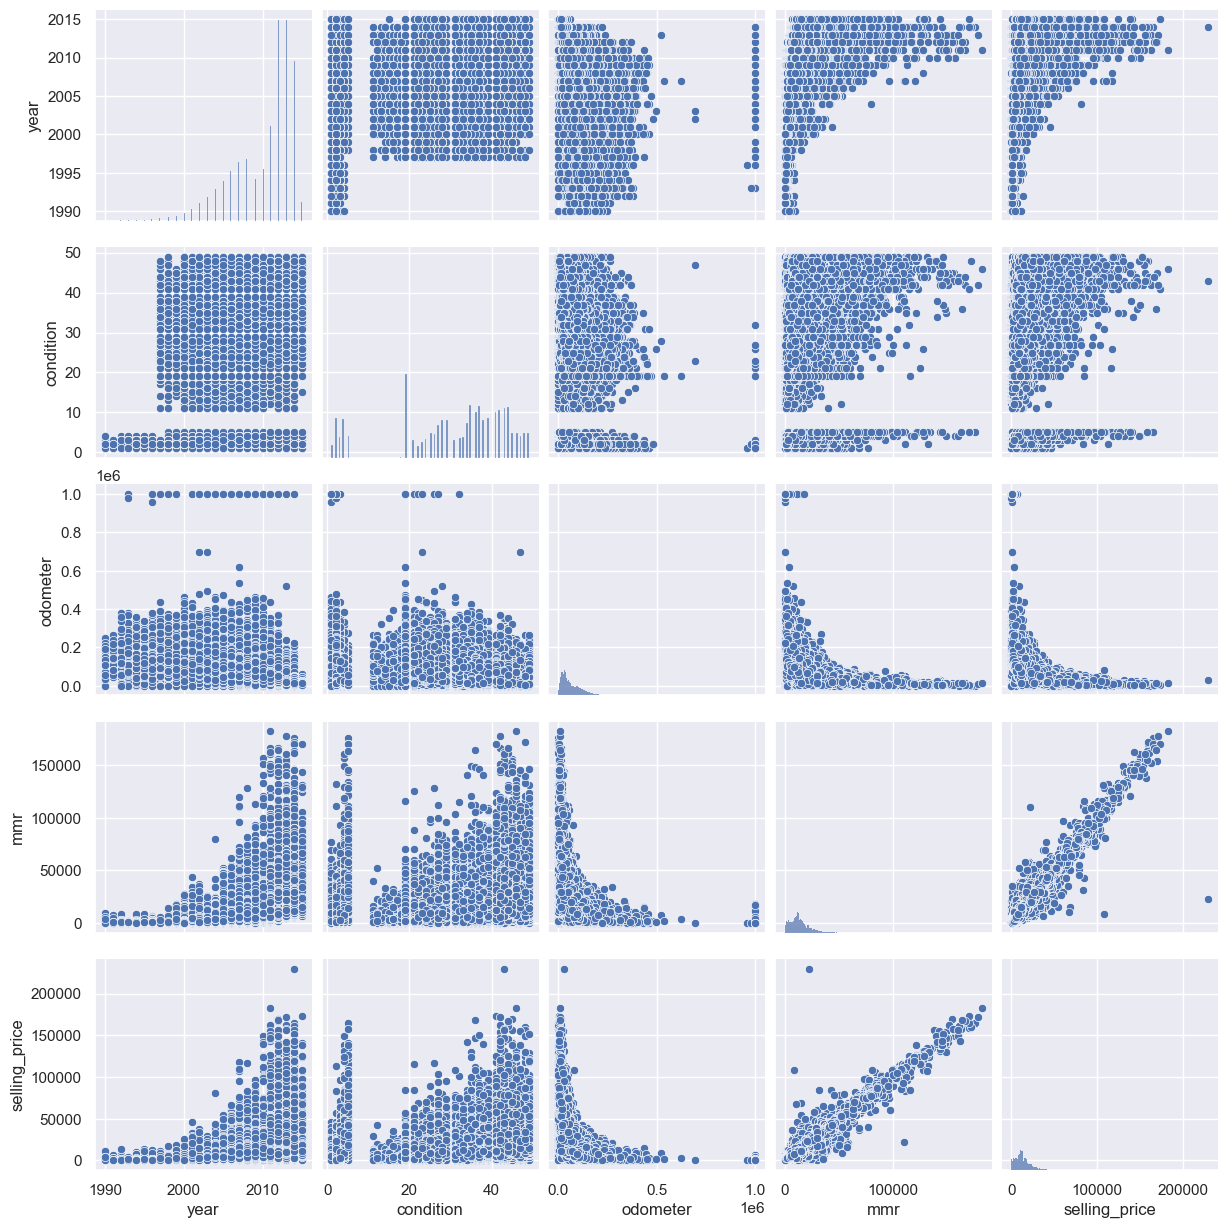

In [23]:
# To visualize the pairplot of data
sns.pairplot(data)

In [24]:
data.describe(include = "number")

,year,condition,odometer,mmr,selling_price
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


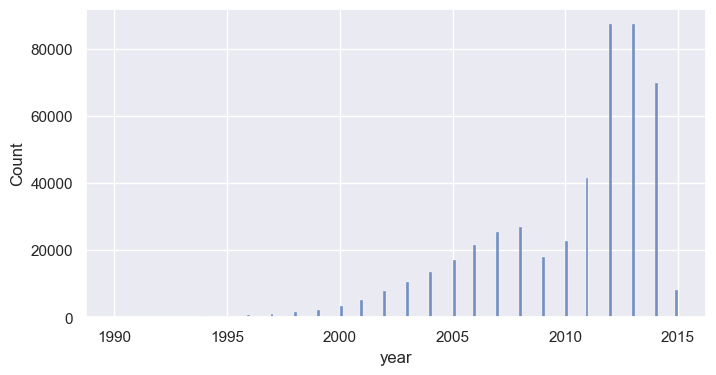

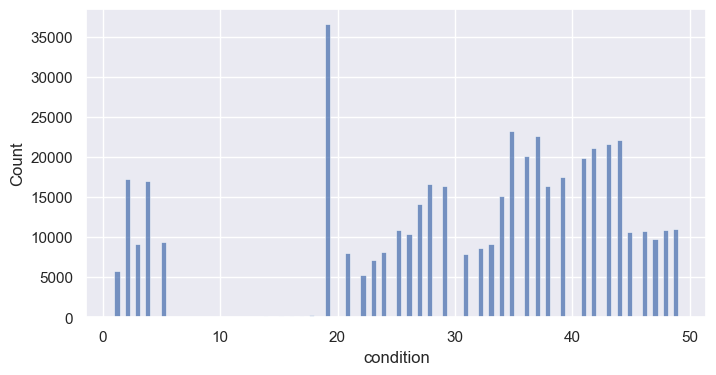

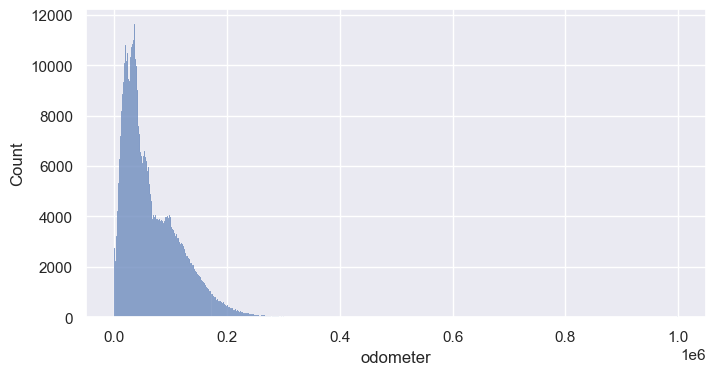

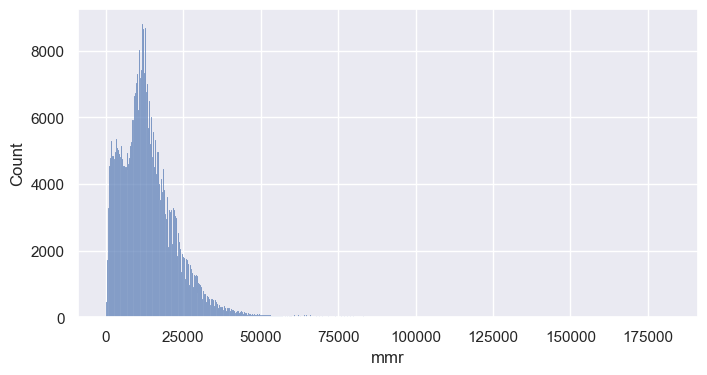

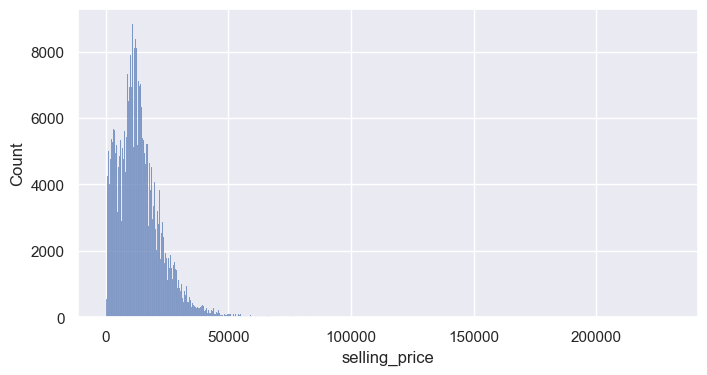

In [25]:
# Histogram to understand the distribution
for i in data.select_dtypes(include = "number").columns:
    sns.histplot(data = data, x = i)
    plt.show()

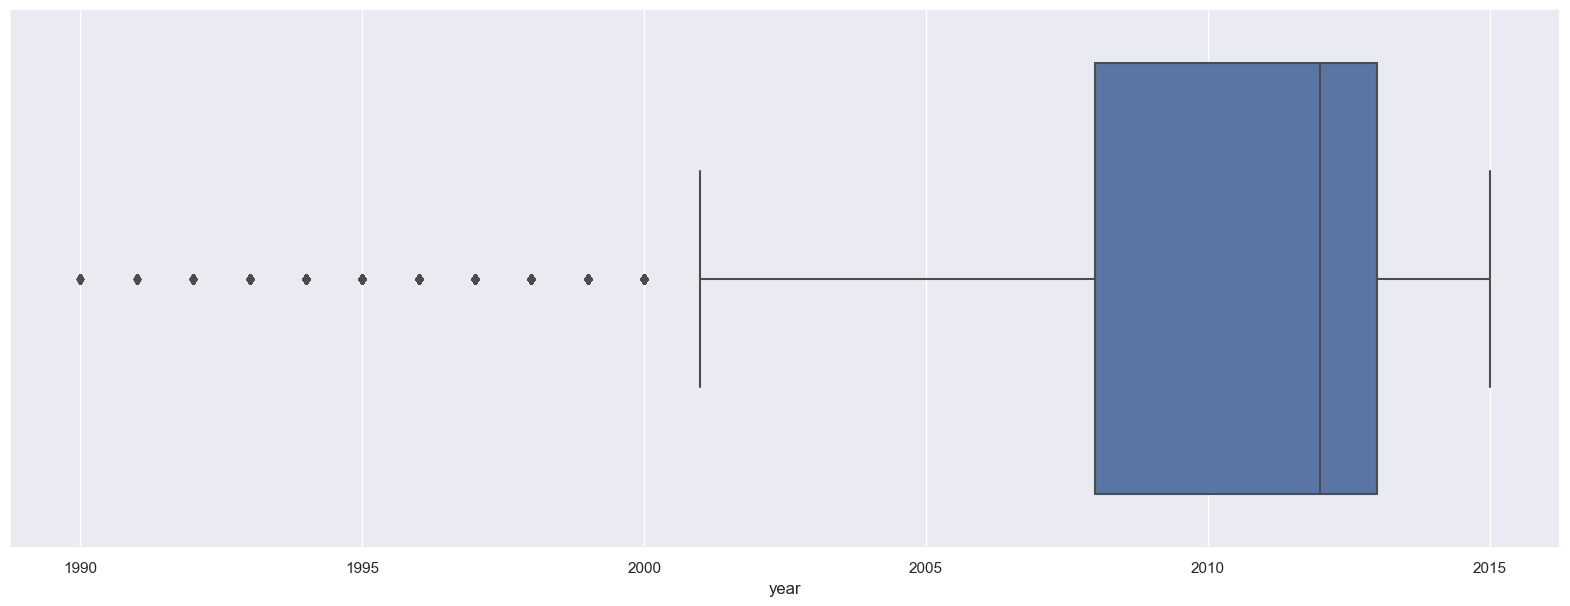

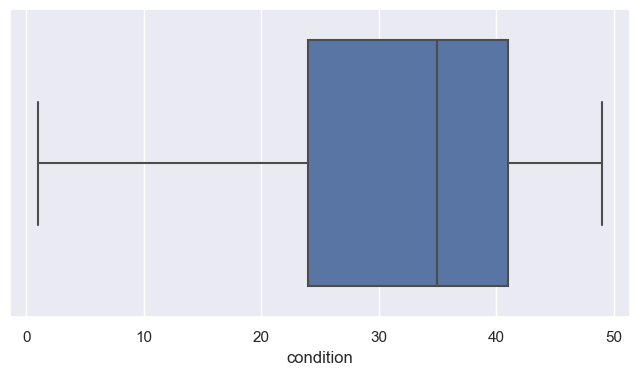

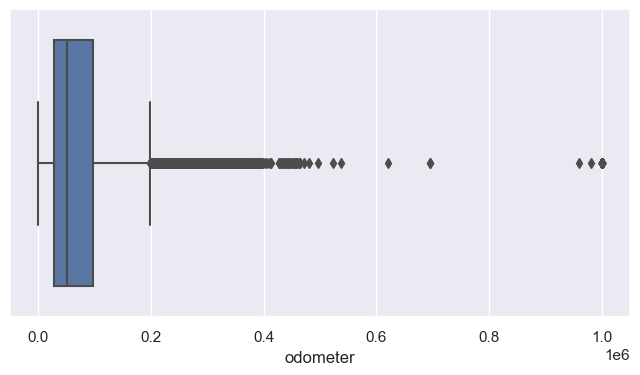

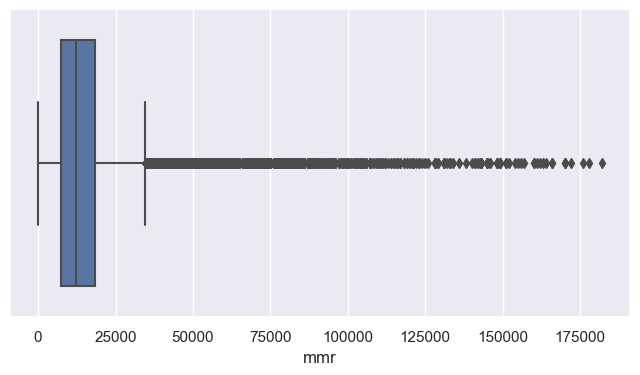

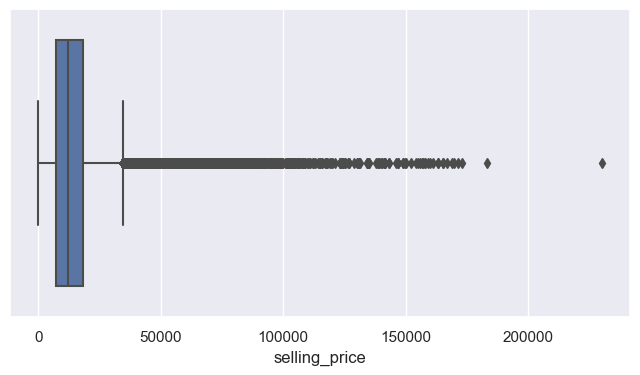

In [26]:
# Boxplot to identify Outliers
plt.figure(figsize = (20,7))
for i in data.select_dtypes(include = "number").columns:
    sns.boxplot(data = data, x = i)
    plt.show()

<Axes: >

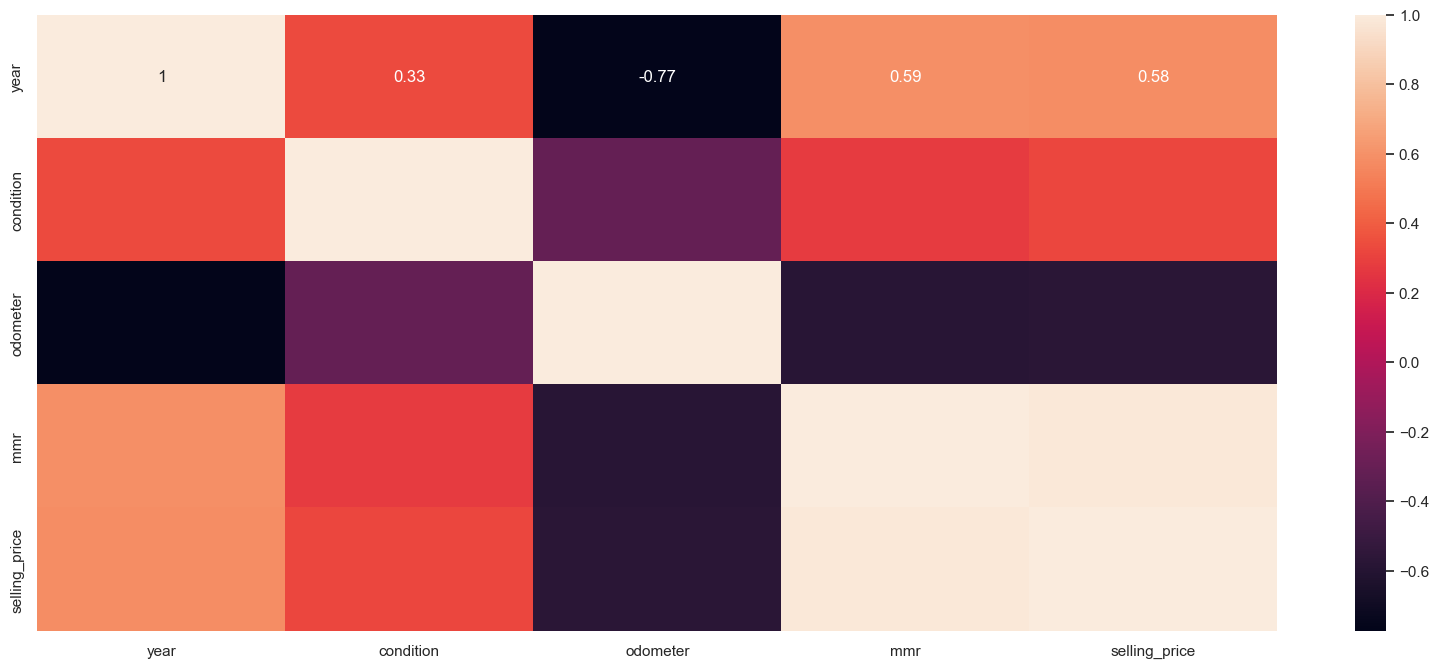

In [27]:
# Correlation with heatmap to interpret the relation and multicollinearity
plt.figure(figsize = (20,8))
s = data.select_dtypes(include = "number").corr()
sns.heatmap(s, annot = True)

In [28]:
data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'selling_price', 'sale_date'],
      dtype='object')

# Count by Year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


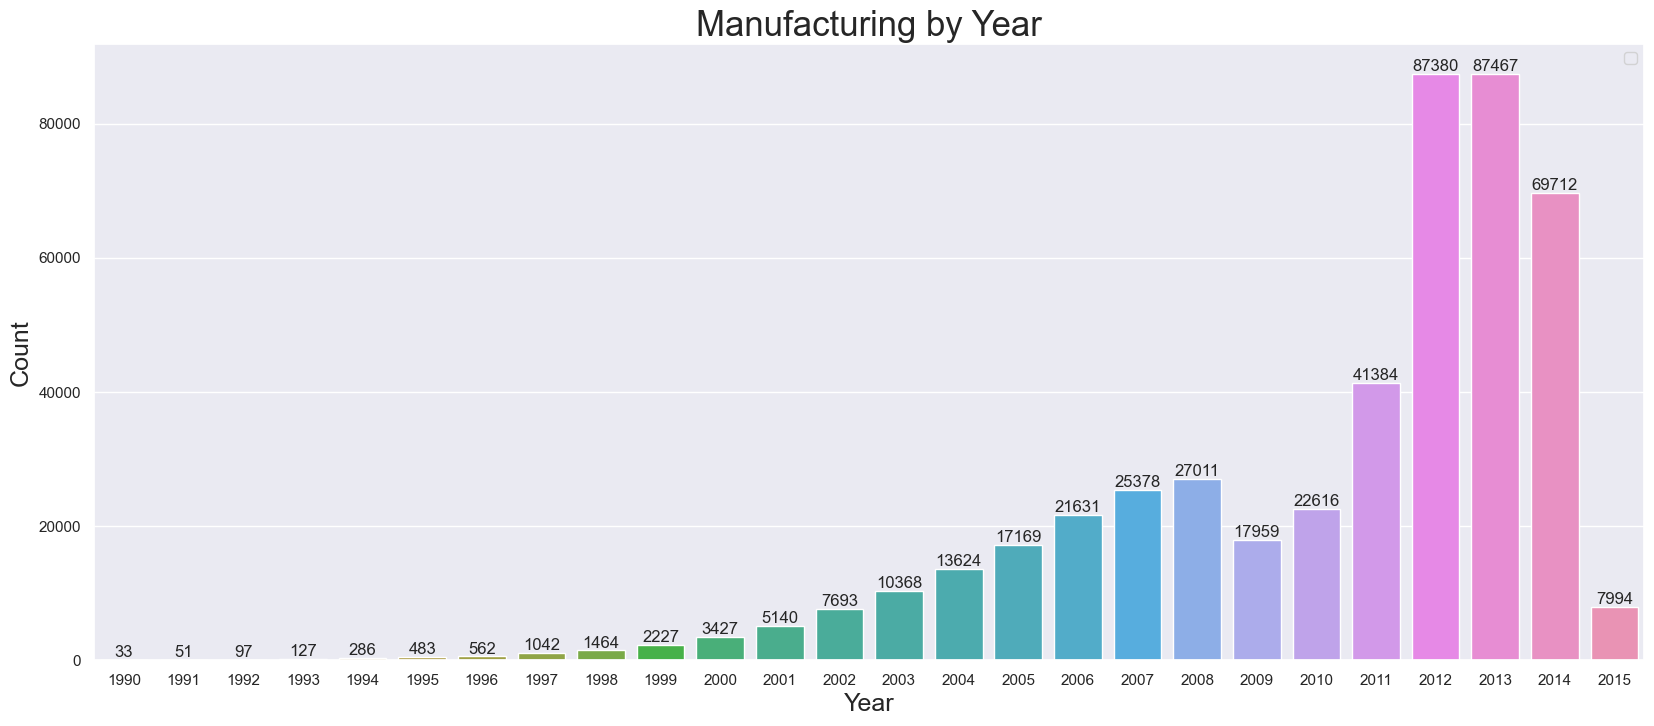

In [29]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'year', data = data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Manufacturing by Year", fontsize = 25)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.legend()
plt.show()

# Count by Manufacturer

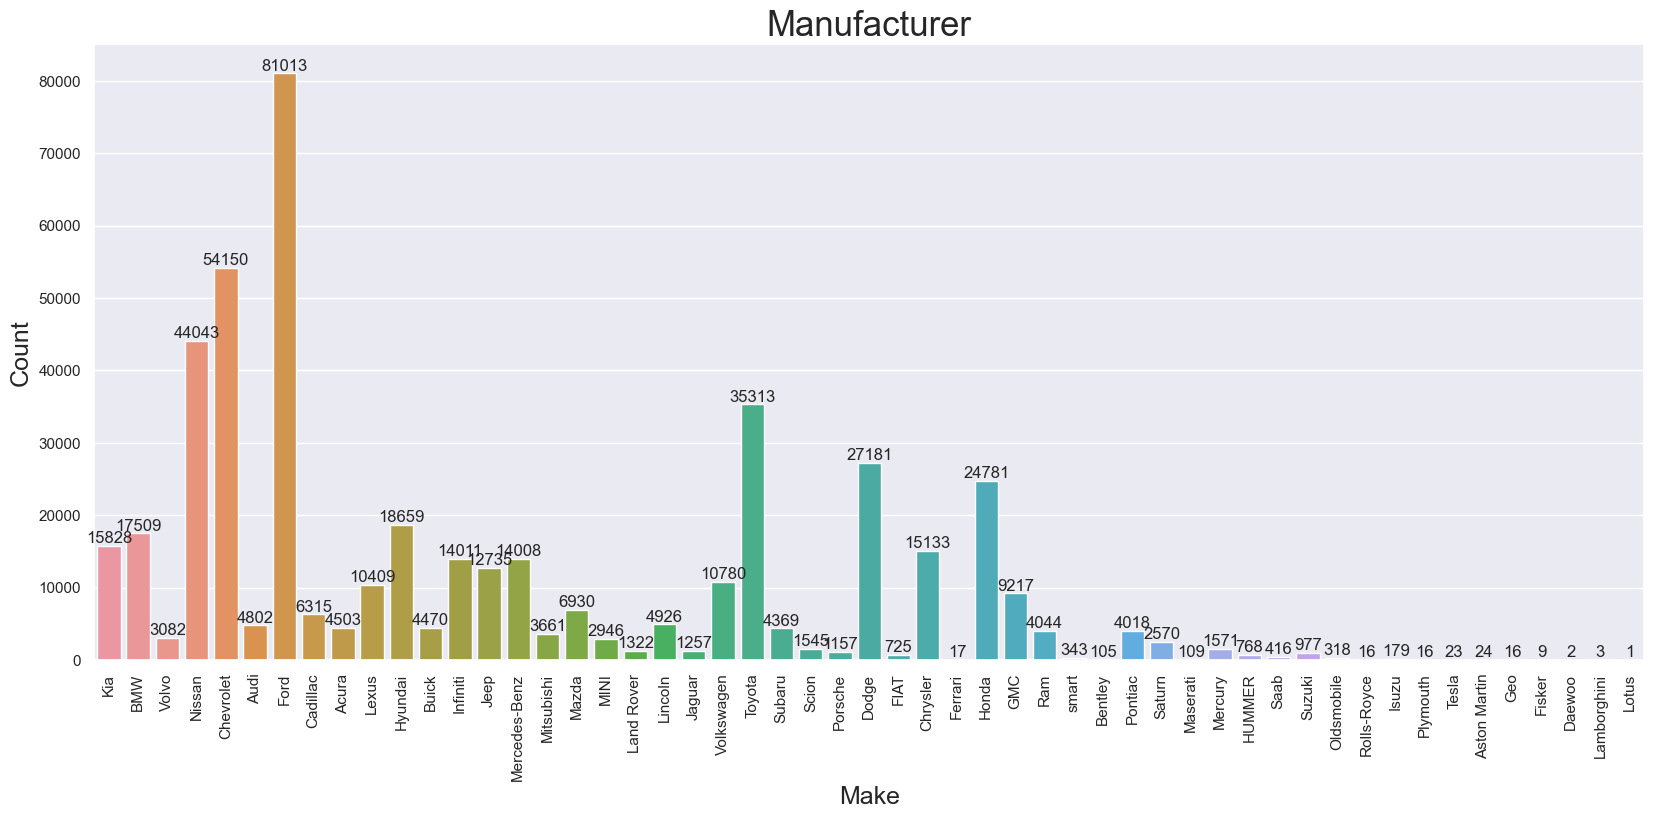

In [30]:
sns.set(rc = {'figure.figsize':(20,8)})
ax = sns.countplot(x = 'make', data = data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Manufacturer", fontsize = 25)
plt.xlabel("Make", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.xticks(rotation=90)
plt.show()

# Top Selling Car Models

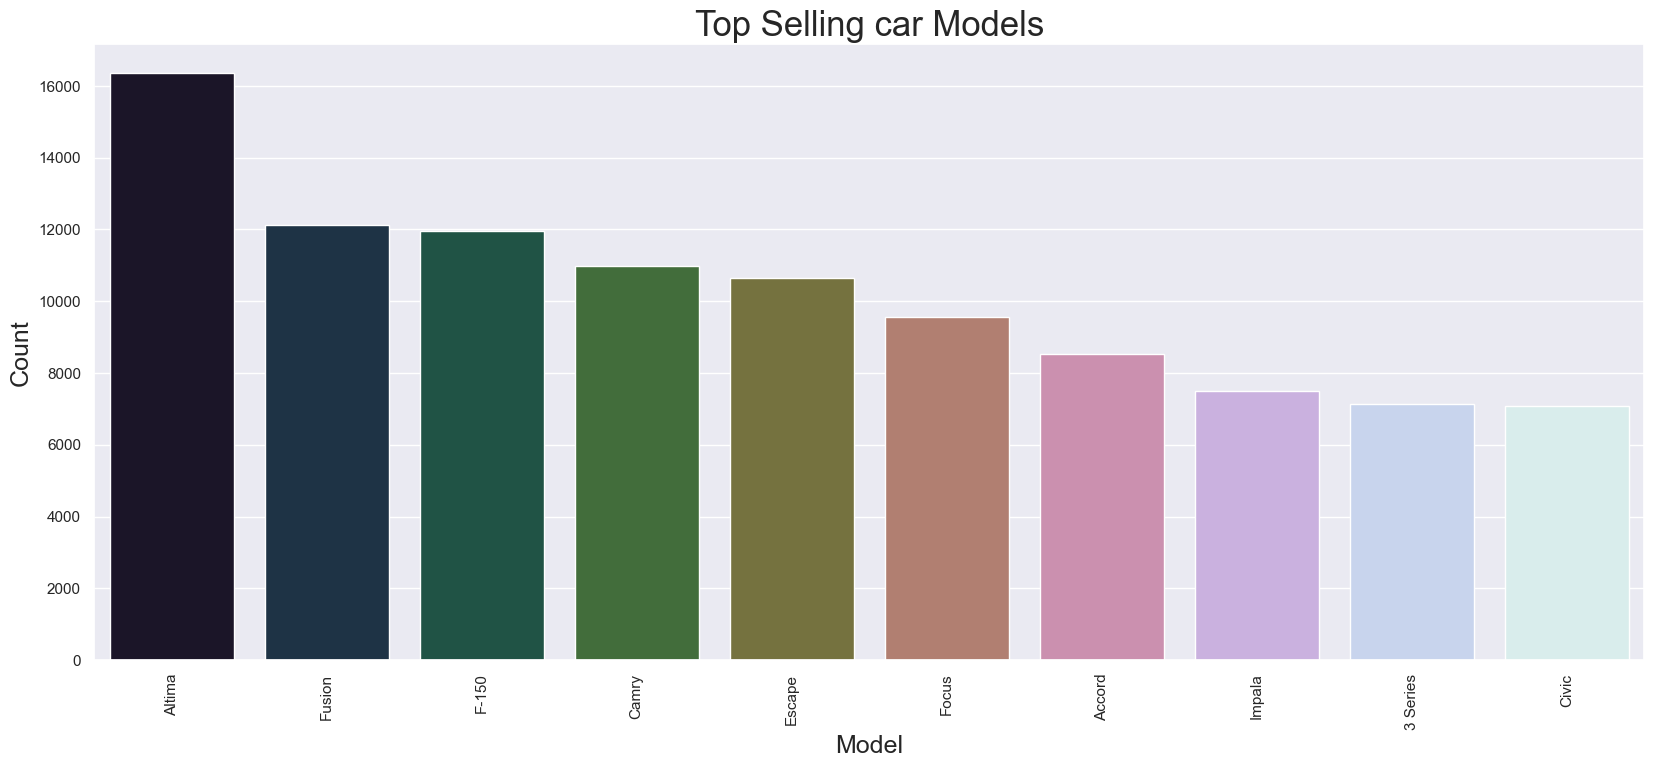

In [31]:
sns.set(rc = {'figure.figsize':(20,8)})
top_selling_models = data['model'].value_counts().head(10)
sns.barplot(y = top_selling_models.values, x = top_selling_models.index, palette = 'cubehelix')
plt.title("Top Selling car Models", fontsize = 25)
plt.xlabel("Model", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.xticks(rotation=90)
plt.show()


# Count by Transmission

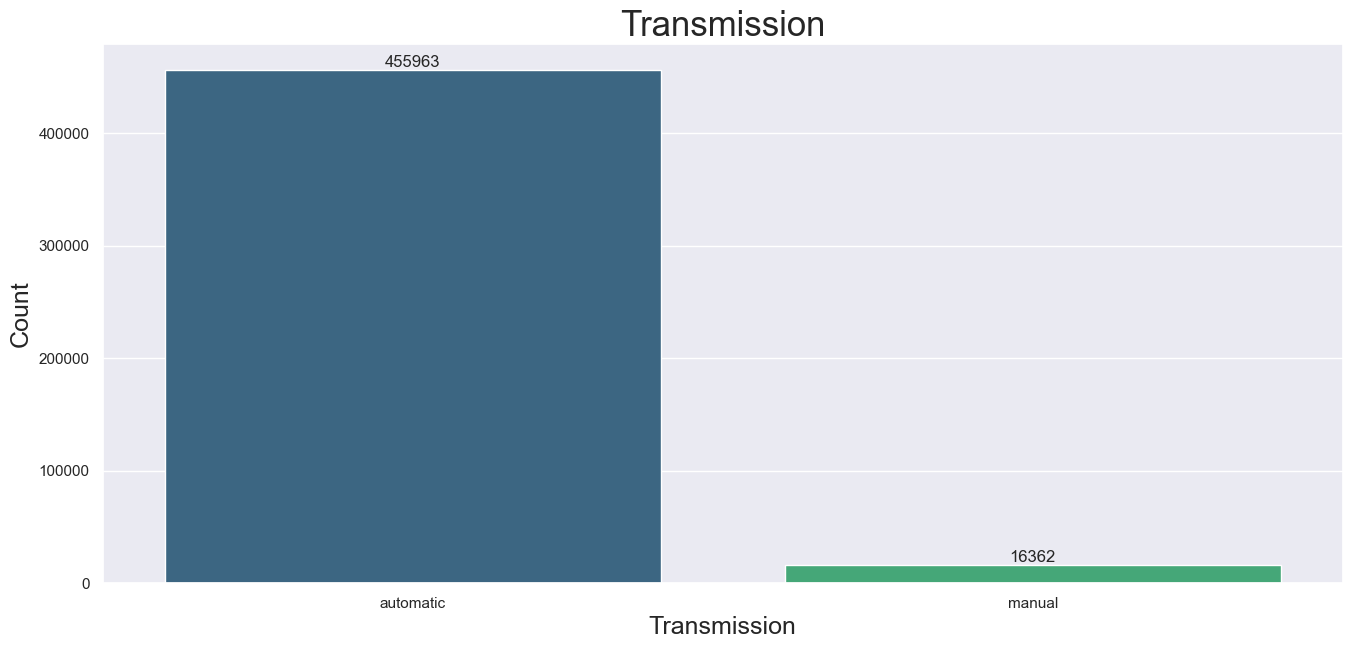

In [32]:
plt.figure(figsize = (16,7))
ax = sns.countplot(x = 'transmission', data = data, palette = 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Transmission", fontsize = "25")
plt.xlabel("Transmission", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.show()

# Count by Car Color

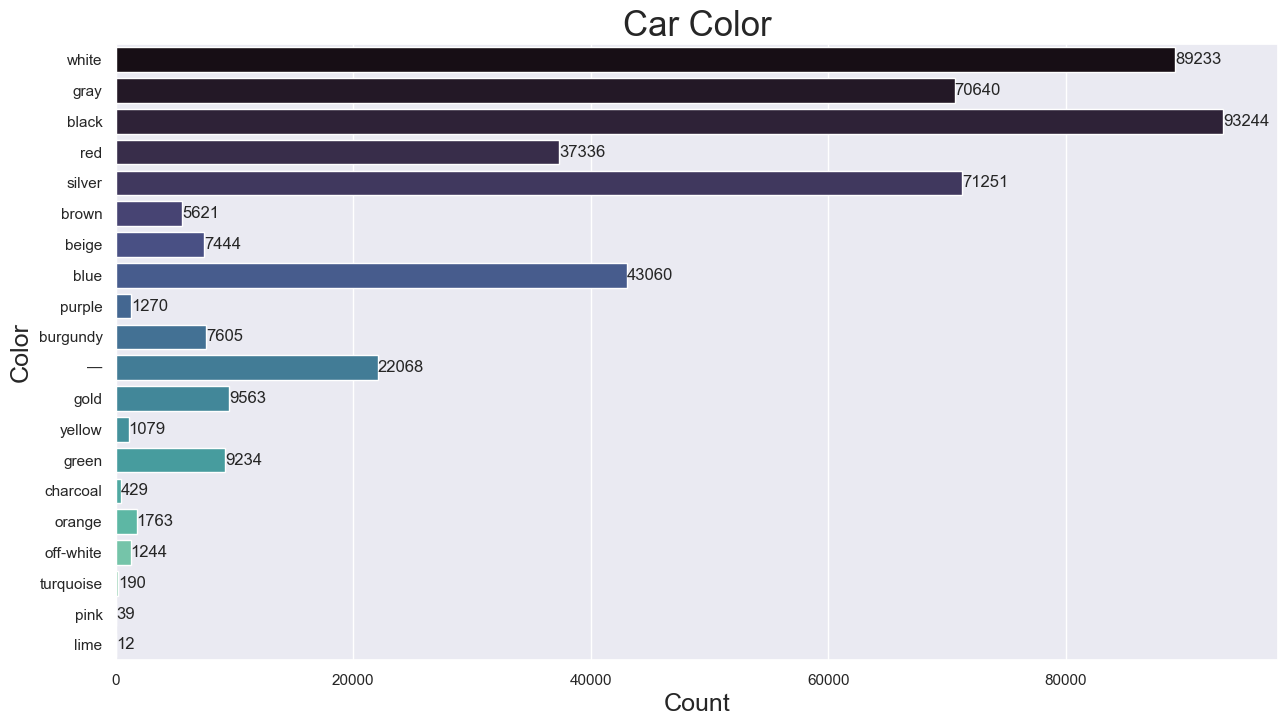

In [33]:
plt.figure(figsize = (15,8))
ax = sns.countplot(y = 'color', data = data, palette = 'mako')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Car Color", fontsize = 25)
plt.xlabel("Count", fontsize = 18)
plt.ylabel("Color", fontsize = 18)
plt.show()

# Count by Interior

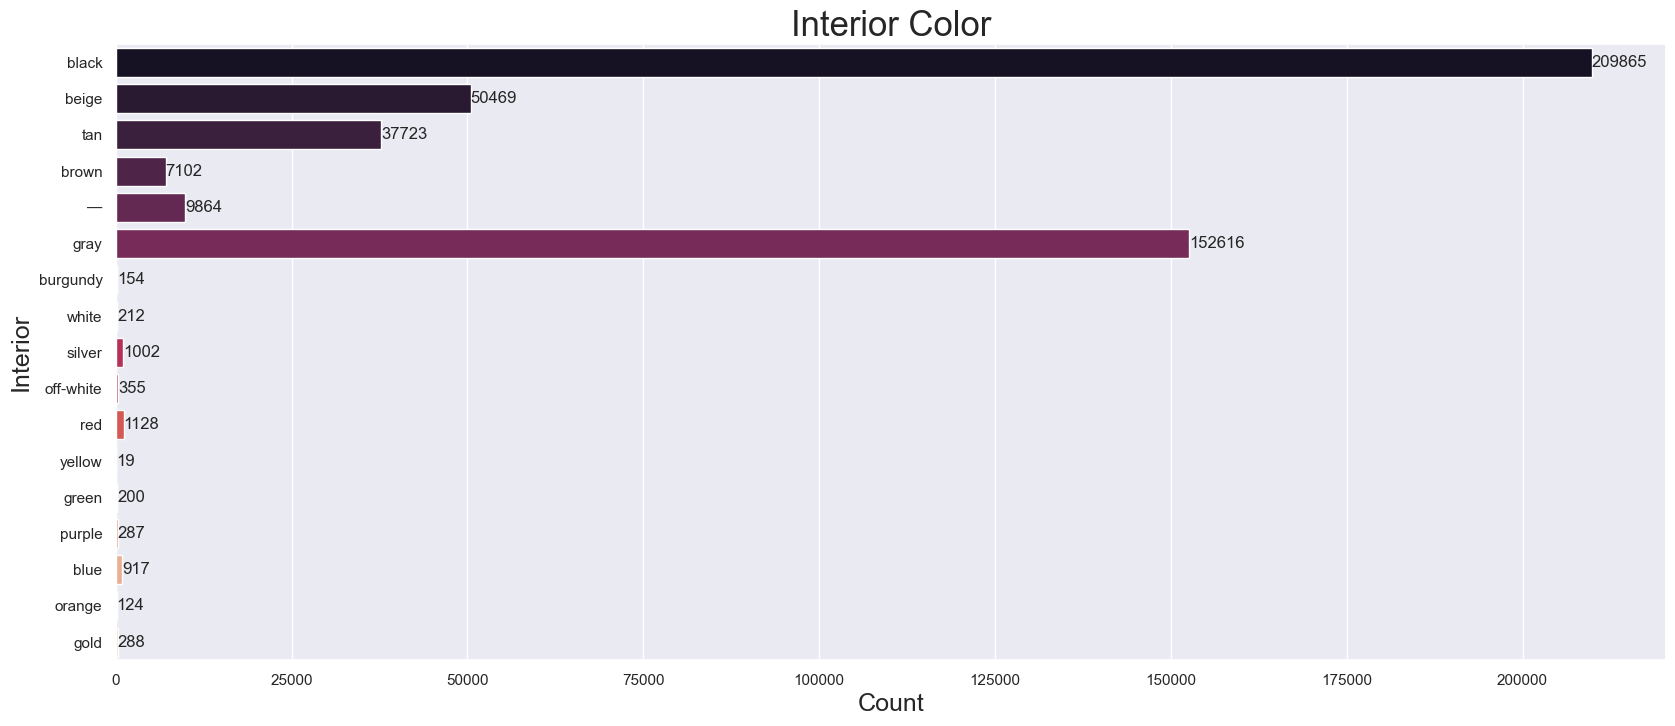

In [34]:
plt.figure(figsize = (20,8))
ax = sns.countplot(y = 'interior', data = data, palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Interior Color", fontsize = 25)
plt.xlabel("Count", fontsize = 18)
plt.ylabel("Interior", fontsize = 18)
plt.show()   

# Top 10 Bodies

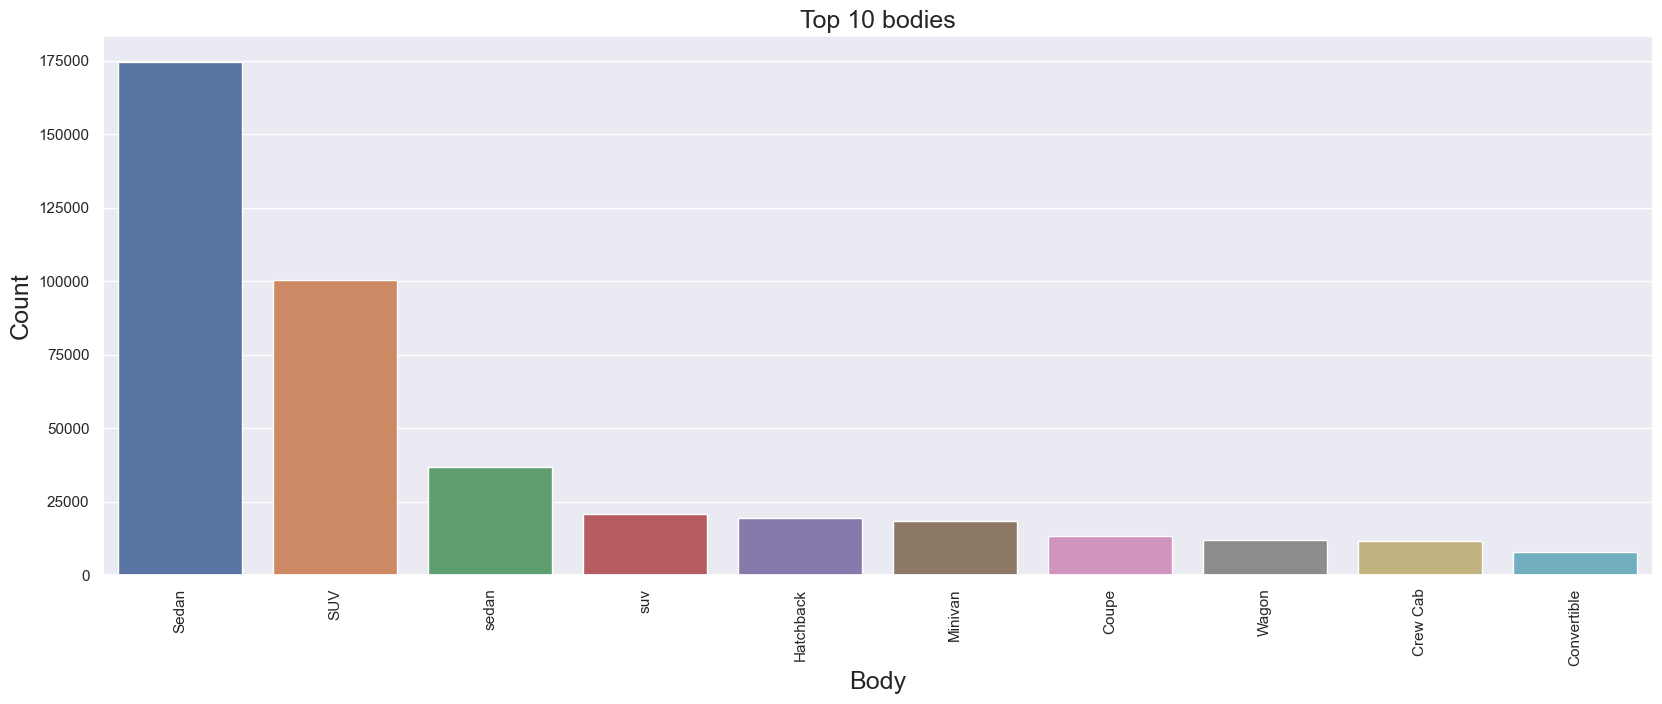

In [35]:
sns.set(rc = {'figure.figsize': (20,7)})
top_10_body = data["body"].value_counts().head(10).reset_index()
top_10_body.columns = ["body","count"]
sns.barplot(y = "count", x = "body", data = top_10_body)
plt.title("Top 10 bodies", fontsize = 18)
plt.xlabel("Body", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.xticks(rotation=90)
plt.show()

# Top 10 states where maxm cars were selled

In [36]:
data['state'].value_counts().head(10)

state
fl    75243
ca    66213
tx    41657
ga    30939
pa    24117
nj    23003
il    21494
oh    20294
tn    19183
nc    18731
Name: count, dtype: int64

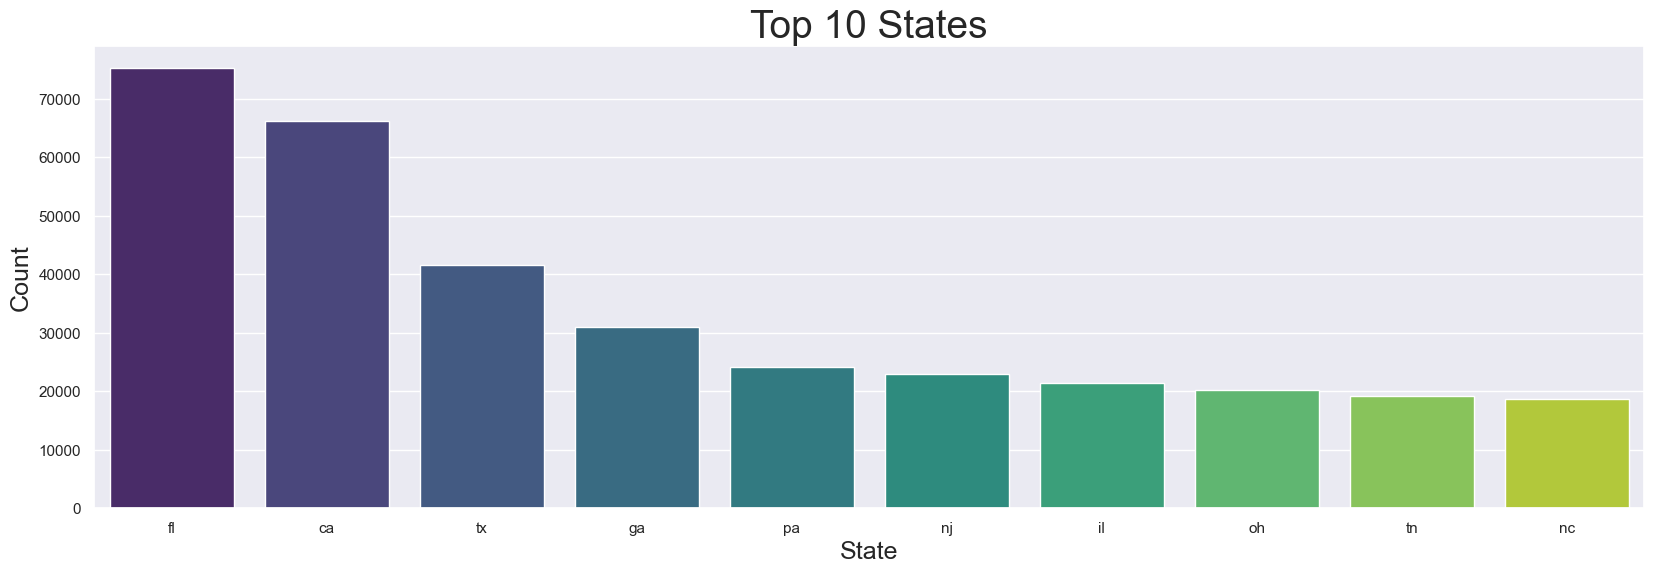

In [37]:
plt.figure(figsize = (20,6))
top_10_states = data["state"].value_counts().head(10).reset_index()
top_10_states.columns = ["state","count"]
sns.barplot(y = "count", x = "state", data = top_10_states, palette = "viridis")
plt.title("Top 10 States", fontsize = 28)
plt.xlabel("State", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
# plt.xticks(rotation=90)
plt.show()

# Car Color vs Selling Price

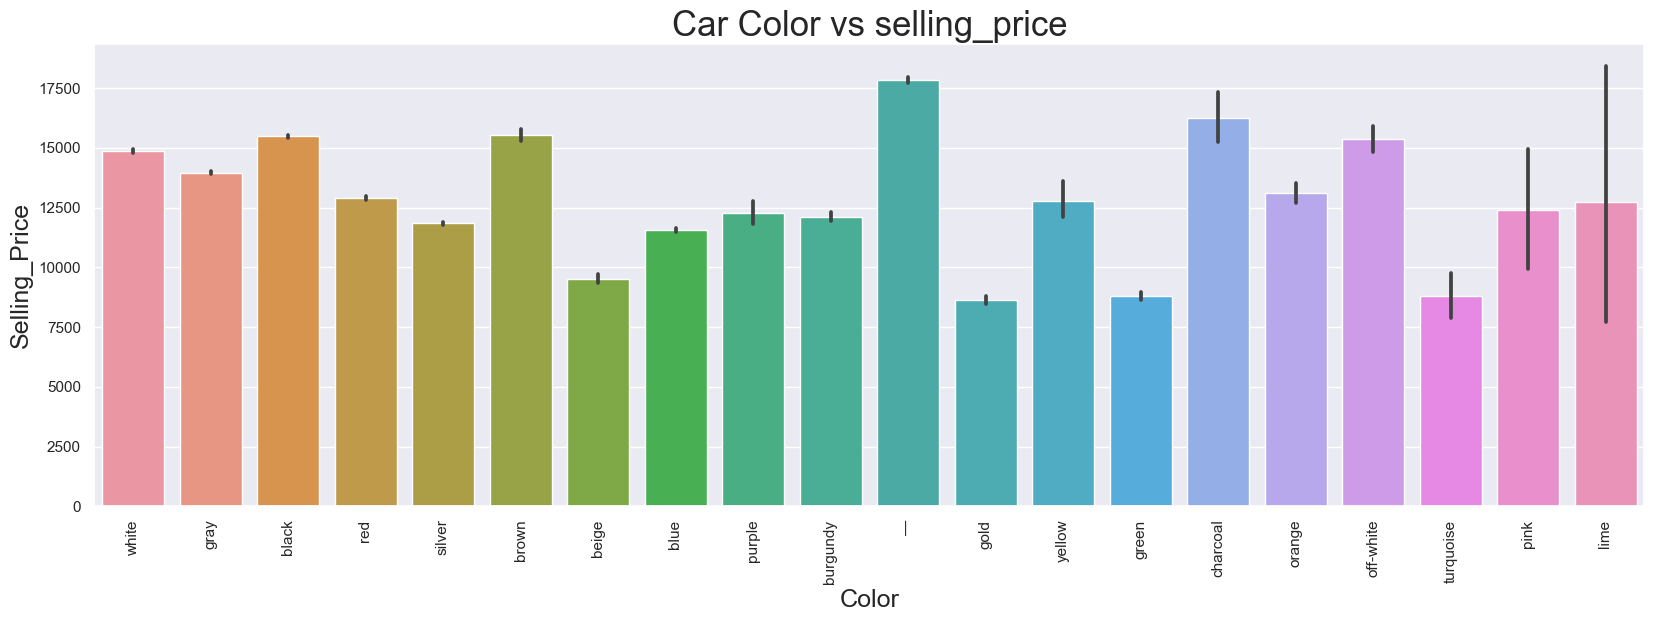

In [38]:
plt.figure(figsize = (20,6))
ax = data.groupby(['color'], as_index = False)['selling_price'].sum().sort_values(by = 'selling_price', ascending = False).head(10)
sns.barplot(x = 'color', y = 'selling_price', data = data)
plt.title("Car Color vs selling_price", fontsize = 25)
plt.xlabel("Color", fontsize = 18)
plt.ylabel("Selling_Price", fontsize = 18)
plt.xticks(rotation=90)
plt.show()

# Interior Color Vs Selling Price

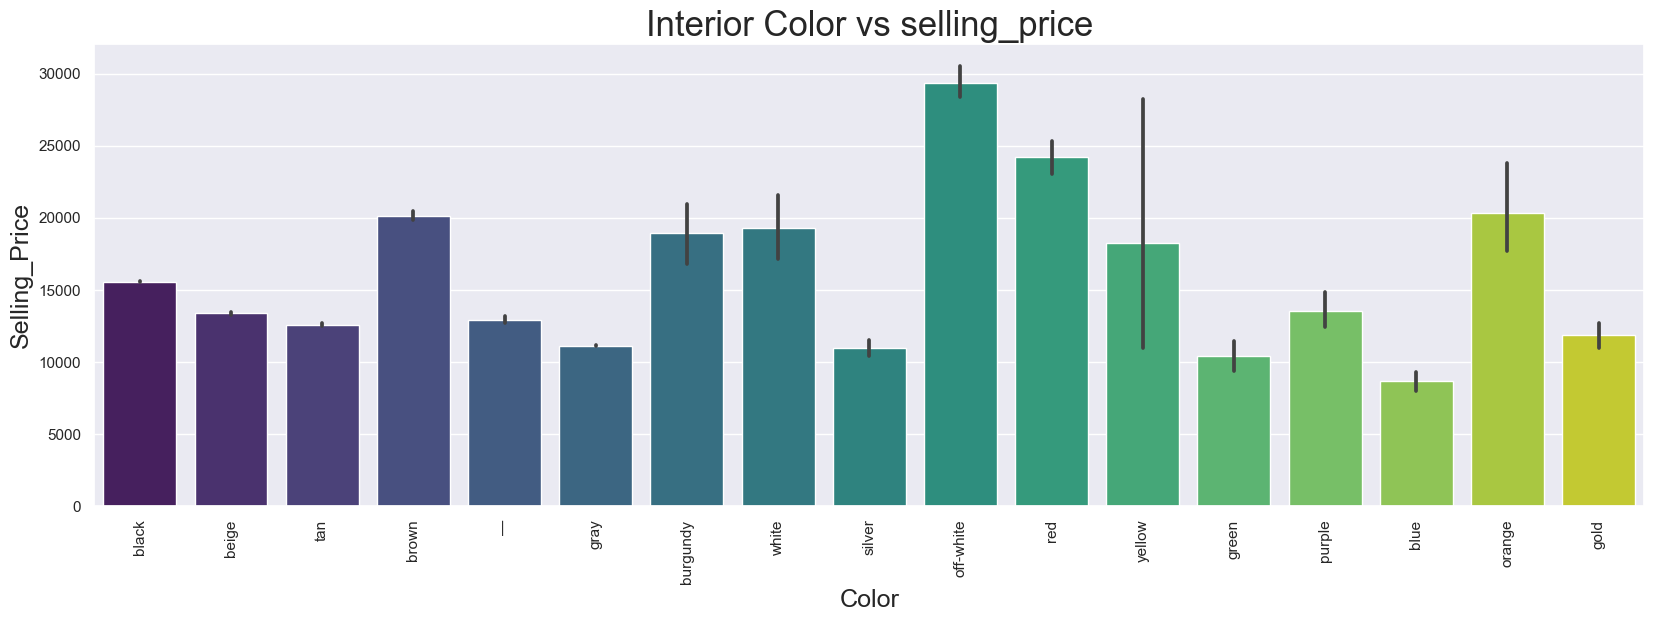

In [39]:
plt.figure(figsize = (20,6))
ax = data.groupby(['interior'], as_index = False)['selling_price'].sum().sort_values(by = 'selling_price', ascending = False).head(10)
sns.barplot(x = 'interior', y = 'selling_price', data = data, palette = 'viridis')
plt.title("Interior Color vs selling_price", fontsize = 25)
plt.xlabel("Color", fontsize = 18)
plt.ylabel("Selling_Price", fontsize = 18)
plt.xticks(rotation=90)
plt.show()

# Manufacturer vs selling_price

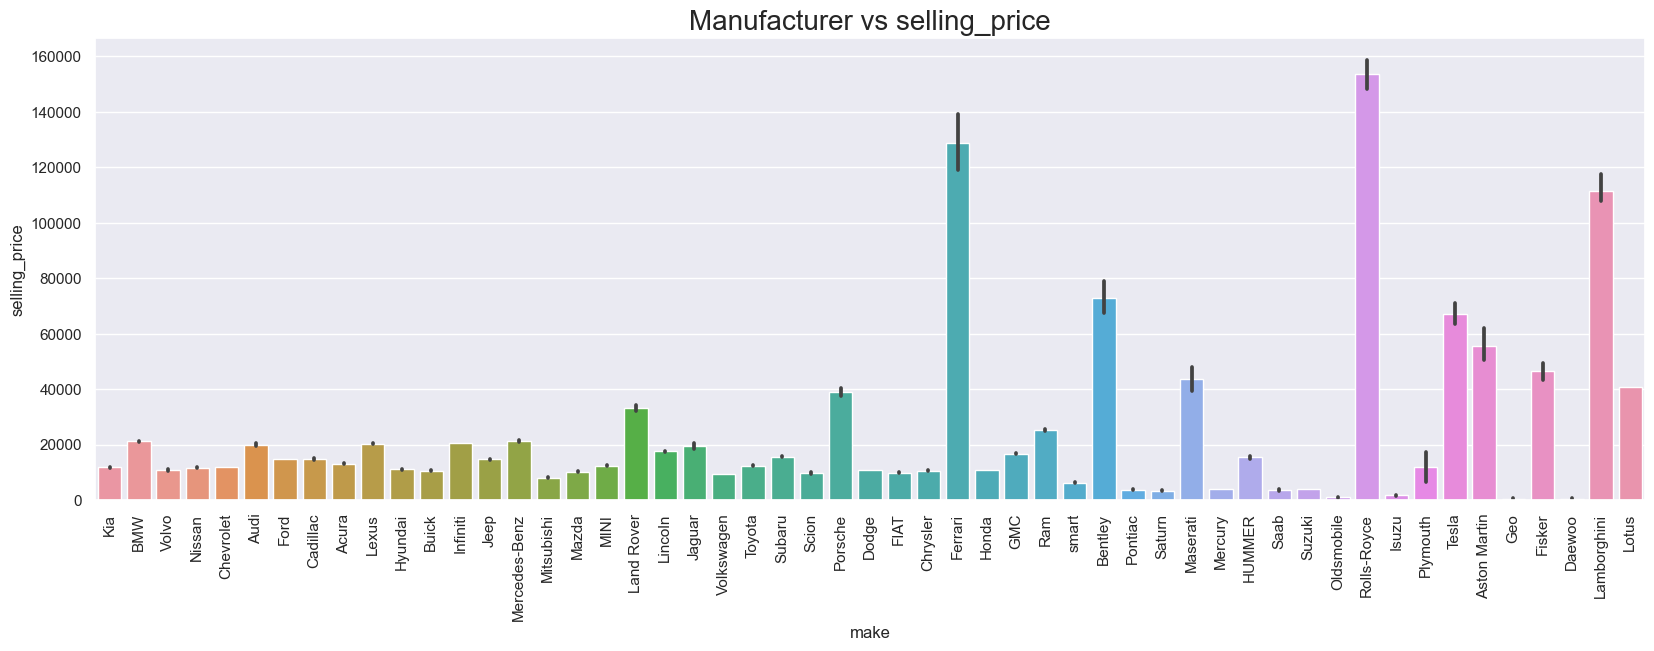

In [40]:
plt.figure(figsize = (20,6))
ax = data.groupby(['make'], as_index = False)['selling_price'].sum().sort_values(by = 'selling_price').head(10)
sns.barplot(x = 'make', y = 'selling_price', data = data)
plt.title("Manufacturer vs selling_price", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

# Brand vs selling Price by transmission

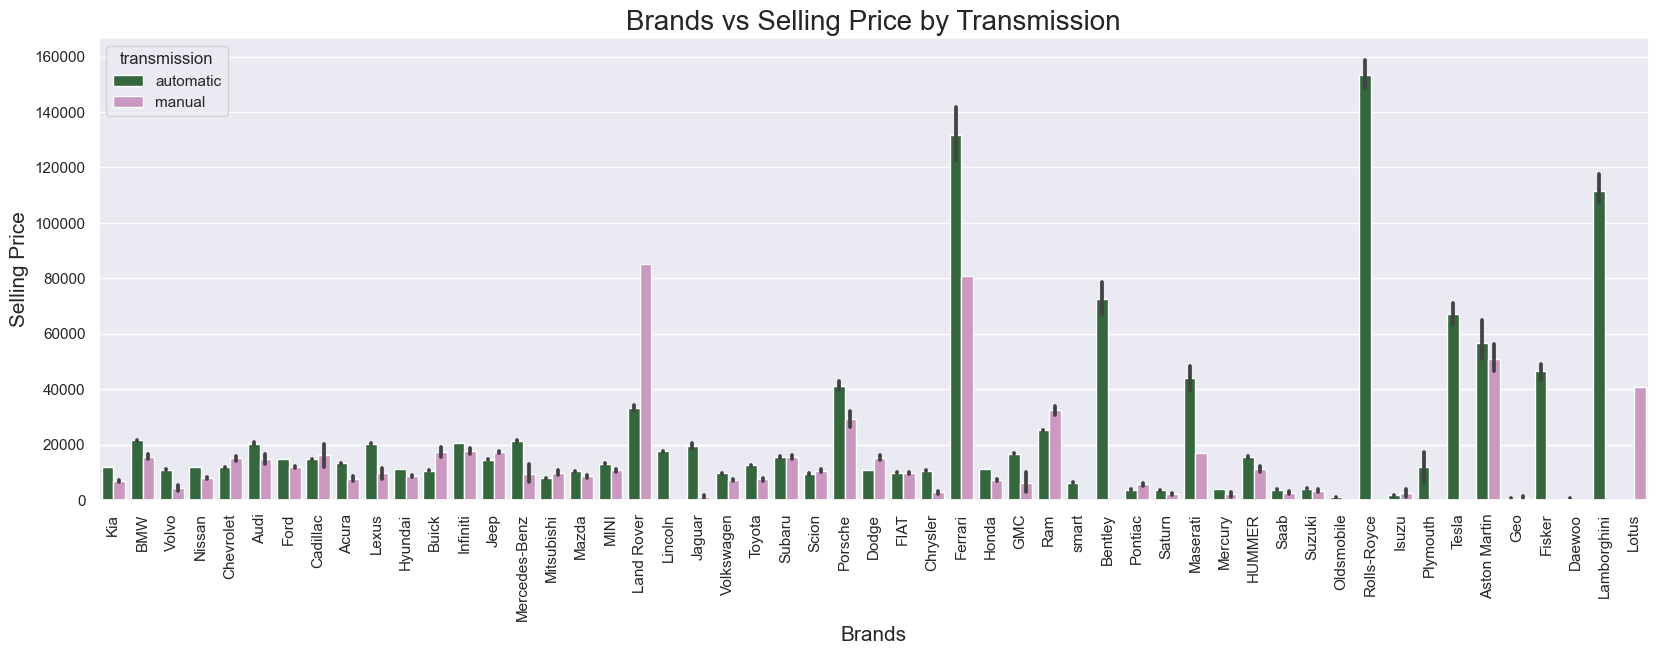

In [41]:
sns.set(rc = {'figure.figsize':(20,6)})
sns.barplot(x=data['make'], y=data['selling_price'], hue=data['transmission'], palette = 'cubehelix')
plt.title('Brands vs Selling Price by Transmission', fontsize=20)
plt.xlabel('Brands', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Selling Price', fontsize=15)
plt.show()